Exploratory Data Analysis

In [4]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying plots nicely
%matplotlib inline
sns.set(style='whitegrid')

# To import from src/
import os
import sys
sys.path.append('../src')

from data_loader import load_data

ratings, movies, df = load_data()

Looking for data in: e:\recommendation\data


Step 1: Load & Merge Data

In [5]:
df.head()


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Step 2: Quick Overview

In [6]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape: (105339, 6)

Data types:
 userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object

Missing values:
 userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


Step 3: Ratings Distribution

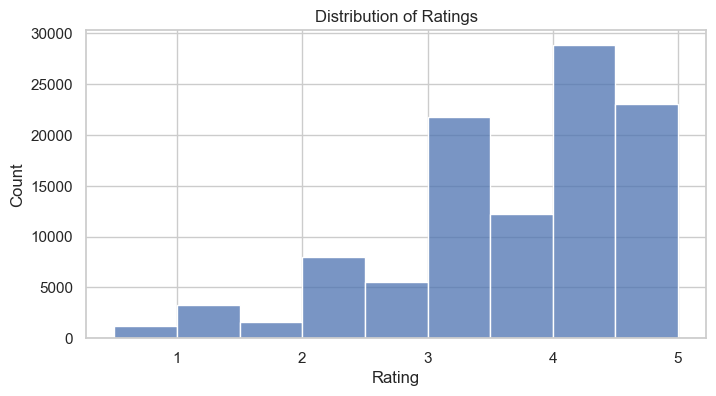

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=np.arange(0.5, 5.5, 0.5), kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Step 4: Top 10 Most Rated Movies

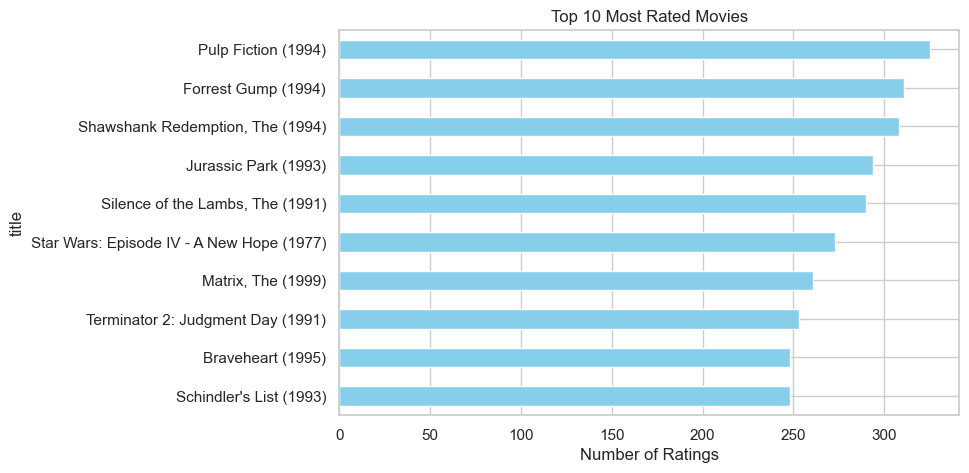

In [8]:
top_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
top_movies.plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.gca().invert_yaxis()
plt.show()

Step 5: Users & Items Overview

In [9]:
n_users = df['userId'].nunique()
n_movies = df['movieId'].nunique()
print(f"Unique users: {n_users}, Unique movies: {n_movies}")

Unique users: 668, Unique movies: 10325


 Step 6: Average Rating per Movie

In [10]:
avg_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_ratings.head(10)

title
Saddest Music in the World, The (2003)                          5.0
Interstate 60 (2002)                                            5.0
Gunfighter, The (1950)                                          5.0
Heima (2007)                                                    5.0
Limelight (1952)                                                5.0
Plague Dogs, The (1982)                                         5.0
Love Me If You Dare (Jeux d'enfants) (2003)                     5.0
Syrup (2013)                                                    5.0
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003)    5.0
Symbol (Shinboru) (2009)                                        5.0
Name: rating, dtype: float64